In [ ]:
# -*- coding: utf-8 -*-
#######################
#    Park Geup Sick   #
#######################
# start from 2018-8-9 #
#       made by       #
#     Kim DongHyeon   #
#     Jang JinWoo     #
#       GODPARK       #
#######################

 # Import package
import random
import codecs
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

# Function
def num_to_list(num):
    result = [0, 0, 0, 0, 0]
    result[num - 1] = 1
    return result

def formatting_data(_list):
    global food_dict
    global next_num
    result = []
    for _i in _list:
        if len(_i) > 0 and '0' <= _i[0] <= '9':
            result.append(int(_i[0]))
        else:
            if _i not in food_dict:
                food_dict[_i] = next_num
                next_num += 1
            result.append(food_dict[_i])
    return result

# DataSet
# 주식, 부식, 부식, 부식, 부식, 부식, 후식, 순서, 시간대, 잔반량
food_dict = {}
next_num = 0
x_data = []
y_data = []

if __name__ == "__main__":
    with codecs.open('data.csv', 'r', encoding='euc-kr', errors='ignore') as f:
        while True:
            read = f.readline()
            if not read:
                break
            read_split = read.split(',')
            data = formatting_data(read_split)
            x_data.append(data[:9])
            y_data.append(num_to_list(data[9]))
    print(x_data)
    print(y_data)
    random.shuffle(x_data)
    random.shuffle(y_data)
    data_slice = int(len(y_data) * 0.8)
    x_train = np.array(x_data[:data_slice])
    y_train = np.array(y_data[:data_slice])
    x_test = np.array(x_data[data_slice:])
    y_test = np.array(y_data[data_slice:])
    print(x_train)
    print(y_train)
    print(x_test)
    print(y_test)
    
    # Design
    model = Sequential()
    num_of_hidden = 3
    hidden_layer = 9
    model.add(Dense(units=hidden_layer, input_dim=9, activation='relu'))
    for i in range(num_of_hidden):
        model.add(Dense(units=hidden_layer, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))
    
    # Compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fitting
    this_epochs = 50
    this_batch_size = 25
    hist = model.fit(x_train, y_train, epochs=this_epochs, batch_size=this_batch_size)
    
    # Process
    print(' ## GOD PARK GEUP SICK ## ')
    print(hist.history['loss'])
    print(hist.history['acc'])
    
    # Evaluate
    loss_and_metrics = model.evaluate(x_test, y_test, batch_size=this_batch_size)
    print(' ## GOD PARK GEUP SICK IS BEING EVALUATED ## ')
    print('loss and metrics')
    print(loss_and_metrics)
    
    # Save
    print(' ## Now Saving... ## ')
    json_string = model.to_json()
    model.save('park_sick.h5')
    print(' ## ...Success! ## ')

Using TensorFlow backend.


[[0, 1, 2, 3, 4, 5, 6, 0, 7], [8, 9, 10, 11, 12, 13, 14, 7, 7], [15, 16, 17, 18, 19, 20, 21, 7, 7], [22, 23, 24, 9, 25, 26, 27, 7, 7], [28, 29, 17, 30, 31, 32, 7, 7, 7], [33, 34, 17, 35, 36, 37, 33, 38, 7], [39, 40, 41, 4, 42, 43, 44, 45, 7], [46, 27, 47, 9, 48, 49, 50, 46, 27], [51, 52, 53, 9, 51, 54, 7, 7, 7], [27, 55, 56, 57, 4, 58, 7, 7, 7], [59, 9, 60, 61, 62, 7, 7, 7, 7], [63, 64, 65, 66, 9, 67, 32, 7, 7], [17, 68, 69, 70, 71, 27, 7, 7, 7], [72, 9, 73, 74, 75, 7, 7, 7, 7], [59, 42, 76, 17, 77, 78, 27, 7, 7], [79, 80, 9, 81, 82, 80, 7, 7, 7], [83, 84, 9, 85, 86, 27, 7, 7, 7], [87, 47, 88, 9, 89, 90, 45, 7, 7], [38, 33, 36, 37, 17, 29, 7, 7, 7], [27, 46, 91, 17, 92, 93, 46, 7, 7], [94, 95, 96, 9, 97, 98, 94, 27, 7], [99, 9, 100, 101, 102, 103, 7, 7, 7], [104, 59, 27, 17, 105, 7, 7, 7, 7], [106, 9, 107, 108, 109, 27, 81, 7, 7], [110, 111, 17, 112, 113, 21, 7, 7, 7], [96, 114, 115, 116, 17, 117, 118, 7, 7], [119, 120, 121, 122, 9, 123, 124, 121, 27], [27, 125, 126, 127, 128, 129, 7, 

Epoch 1/50
240/240 [==============================] - 2s 8ms/step - loss: 15.4609 - acc: 0.0167
Epoch 2/50
240/240 [==============================] - 0s 200us/step - loss: 15.0374 - acc: 0.0167
Epoch 3/50
240/240 [==============================] - 0s 203us/step - loss: 13.7854 - acc: 0.0375
Epoch 4/50
240/240 [==============================] - 0s 200us/step - loss: 12.2308 - acc: 0.1750
Epoch 5/50
240/240 [==============================] - 0s 203us/step - loss: 10.7968 - acc: 0.2458
Epoch 6/50
240/240 [==============================] - 0s 219us/step - loss: 8.1099 - acc: 0.3708
Epoch 7/50
240/240 [==============================] - 0s 209us/step - loss: 7.4575 - acc: 0.4333
Epoch 8/50
240/240 [==============================] - 0s 209us/step - loss: 6.6835 - acc: 0.4000
Epoch 9/50
240/240 [==============================] - 0s 227us/step - loss: 4.2669 - acc: 0.4042
Epoch 10/50
240/240 [==============================] - 0s 228us/step - loss: 2.4931 - acc: 0.5042
Epoch 11/50
240/240 [=====

In [2]:
from keras.models import load_model
#from main import formatting_data
import numpy as np

# Import model
print(" ## IMPORT MODEL ## ")
model = load_model('park_sick.h5')

# Testing
_test = ['쌀밥', '쇠고기미역국', '브로컬리/초고추장', '배추김치', '바나나(손)', '우유', '돈육김치볶음', '숙주나물', '', '3']
test = formatting_data(_test)

x = np.array([test[:9]])
y = model.predict(x)

print(" ## TEST RESULT ## ")
print(y)

result = np.argmax(y)
if result == 0:
    print('매우 적음')
elif result == 1:
    print('적음')
elif result == 2:
    print('보통')
elif result == 3:
    print('많음')
else:
    print('매우 많음')

 ## IMPORT MODEL ## 
 ## TEST RESULT ## 
[[5.8359160e-06 5.8515692e-01 4.1483706e-01 1.7602947e-30 1.2446320e-07]]
적음


 ## IMPORT MODEL ## 
 ## TEST RESULT ## 
[[1.0229130e-02 5.3484797e-01 4.4759524e-01 4.6201554e-10 7.3276856e-03]]
적음


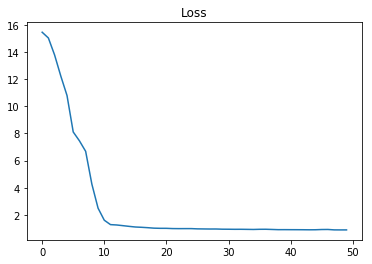

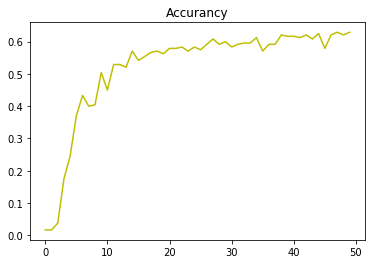

In [4]:
from keras.models import load_model
#from main import formatting_data
import numpy as np
import matplotlib.pyplot as plt

# Import model
print(" ## IMPORT MODEL ## ")
model = load_model('park_sick.h5')

# Testing
_test = ['쌀밥', '시금치나물', '시금치나물', '시금치나물', '시금치나물', '배추김치', '방울토마토', '0', '2', '3']
test = formatting_data(_test)
x = np.array([test[:9]])
y = model.predict(x)
print(" ## TEST RESULT ## ")
print(y)

'''
plt.plot(x, y, lable='test')
plt.title("잔반량 5계급")
plt.show()
'''
    
result = np.argmax(y)
if result == 0:
    print('매우 적음')
elif result == 1:
    print('적음')
elif result == 2:
    print('보통')
elif result == 3:
    print('많음')
else:
    print('매우 많음')
    
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.show()

plt.title('Accurancy')
plt.plot(hist.history['acc'], c='y')
plt.show()

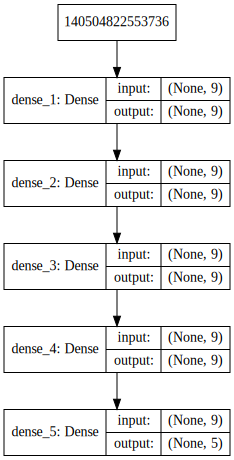

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))